# Movie Rating Analysis - 2023 Released Movies

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movie_2023 = []

#connect to the website (multiple pages)
for i in range (1,3):
    url = f'https://www.imdb.com/list/ls082239486/?st_dt=&mode=detail&page={i}&sort=list_order,asc'
    content = requests.get(url)
    soup = BeautifulSoup(content.text,'html.parser')

    #Identify the main movie list
    movie_list = soup.find('div',class_='lister-list').find_all('div',class_='lister-item mode-detail')

    #Iterate through all the elements in the movie

    for movie in movie_list:
        #Check whether the runtime tag is available and continue if not available
        runtime_tag = movie.find('p',class_='text-muted text-small').find('span',class_='runtime')
        if runtime_tag:
            try:
                name = movie.find('h3',class_='lister-item-header').a.text
                
                list_number = movie.find('h3',class_='lister-item-header').span.text.split('.')[0]
                
                runtime_str = runtime_tag.text.split(' ')[0]
                runtime = int(runtime_str)
                
                genres_uncleaned= movie.find('p',class_='text-muted text-small').find('span',class_='genre').text.split(',')
                # Remove unwanted characters using list comprehension
                genres = ', '.join([genre.strip() for genre in genres_uncleaned])
                
                rating_str = movie.find('div',class_='ipl-rating-star small').find('span',class_='ipl-rating-star__rating').text
                rating = float(rating_str)
                
                intro = movie.find('p',class_='').text
                
                votings_str = movie.find('span',attrs={'name':'nv'}).text
                votings = int(votings_str.replace(',',''))
                
                movie_2023.append([ name, genres, runtime, rating, votings])

                #print (list_number, name, runtime, genres, rating, votings)

            except Exception as null:
                print(null)
                continue

        else:
            continue

In [4]:
type(votings)

int

In [5]:
df = pd.DataFrame(movie_2023, columns = ['Title','Genres','Runtime (mins)','Rating','Votings'])
df

,Title,Genres,Runtime (mins),Rating,Votings
0,Oppenheimer,"Biography, Drama, History",180,8.4,643770
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163,7.7,231156
2,The Marvels,"Action, Adventure, Fantasy",105,5.6,107362
3,Wonka,"Adventure, Comedy, Family",116,7.1,97165
4,Killers of the Flower Moon,"Crime, Drama, History",206,7.7,205299
...,...,...,...,...,...
159,Family Switch,"Comedy, Family",106,5.6,24338
160,No One Will Save You,"Horror, Sci-Fi, Thriller",93,6.3,62153
161,Totally Killer,"Comedy, Horror",106,6.5,47436
162,Poor Things,"Comedy, Drama, Romance",141,8.4,96757


In [6]:
#Split different genres in genres column to new columns
genres_expanded = df['Genres'].str.split(',',expand = True)

#Concatenate expanded columns to main dataframe
df = pd.concat([df,genres_expanded], axis = 1)
df.rename(columns = {0:'Genre 1',1:'Genre 2',2:'Genre 3'}, inplace = True)
df.head()

,Title,Genres,Runtime (mins),Rating,Votings,Genre 1,Genre 2,Genre 3
0,Oppenheimer,"Biography, Drama, History",180,8.4,643770,Biography,Drama,History
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163,7.7,231156,Action,Adventure,Thriller
2,The Marvels,"Action, Adventure, Fantasy",105,5.6,107362,Action,Adventure,Fantasy
3,Wonka,"Adventure, Comedy, Family",116,7.1,97165,Adventure,Comedy,Family
4,Killers of the Flower Moon,"Crime, Drama, History",206,7.7,205299,Crime,Drama,History


In [7]:
#df.to_excel('Movie List_2023.xlsx', index = False)

In [8]:
#df.to_csv('Movie List_2023', index = False)

In [9]:
len(df)

164

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           164 non-null    object 
 1   Genres          164 non-null    object 
 2   Runtime (mins)  164 non-null    int64  
 3   Rating          164 non-null    float64
 4   Votings         164 non-null    int64  
 5   Genre 1         164 non-null    object 
 6   Genre 2         146 non-null    object 
 7   Genre 3         106 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


In [11]:
df.describe().style.format('{:.2f}')

,Runtime (mins),Rating,Votings
count,164.00,164.00,164.00
mean,113.00,6.19,64911.54
std,21.16,0.99,90809.63
min,76.00,2.90,17.00
25%,98.00,5.50,5807.00
50%,108.50,6.15,32752.50
75%,123.00,6.90,97550.50
max,206.00,8.60,643770.00


In [12]:
#Top rated movies
df[['Title','Genres','Rating']].sort_values(by = 'Rating', ascending = False).head()

,Title,Genres,Rating
34,Spider-Man: Across the Spider-Verse,"Animation, Action, Adventure",8.6
0,Oppenheimer,"Biography, Drama, History",8.4
162,Poor Things,"Comedy, Drama, Romance",8.4
155,The Holdovers,"Comedy, Drama",8.0
50,Catching Dust,Drama,7.9


In [13]:
#Function for plot the histogram
def plot_histogram(column_name, pbins, pcolor,pedgecolor):
    plot_name = df[column_name].plot.hist(bins = pbins, color = pcolor, edgecolor = pedgecolor)

    #Add data label at the end of the bar
    def plot_hist_datalabel(plot_name):
        for p in plot_name.patches:
            plot_name.annotate(str(int(p.get_height())),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                               xytext=(0,5), textcoords = 'offset points')
    plot_hist_datalabel(plot_name)

    #chnage the fontsize for title
    plt.title('Histogram of ' + column_name , fontsize = 20)
    plt.xlabel(column_name , fontsize = 15)
    plt.ylabel('Frequency' ,fontsize = 15 )
        

    

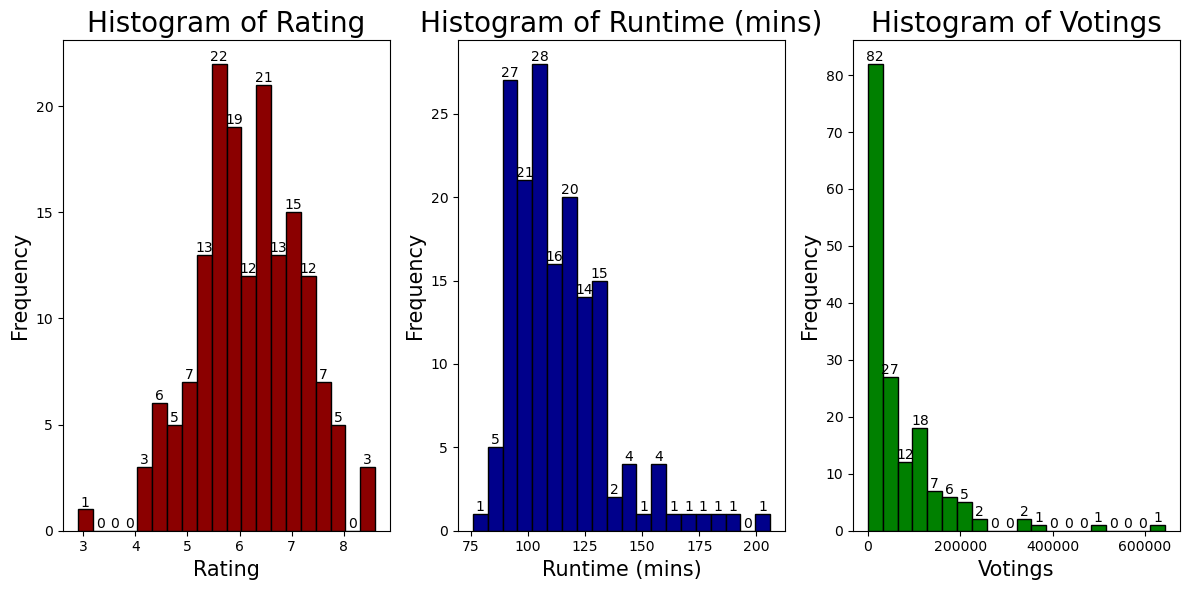

In [14]:
#Multiple histograms
plt.figure(figsize=(12,6))

#for rating
plt.subplot(1,3,1)
plot_histogram('Rating', 20, 'darkred','black')

#for runtime
plt.subplot(1,3,2)
plot_histogram('Runtime (mins)', 20, 'darkblue','black')

#for voting
plt.subplot(1,3,3)
plot_histogram('Votings', 20, 'green','black')

plt.tight_layout()
plt.show()

In [15]:
#find correlation
df[['Runtime (mins)','Rating','Votings']].corr()

,Runtime (mins),Rating,Votings
Runtime (mins),1.000000,0.449665,0.523641
Rating,0.449665,1.000000,0.491183
Votings,0.523641,0.491183,1.000000


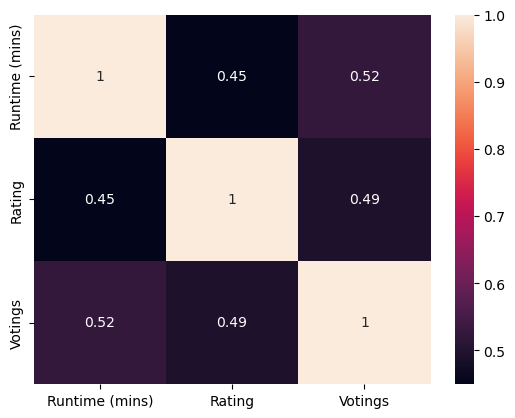

In [16]:
#Heatmap for correlations
sns.heatmap(df[['Runtime (mins)','Rating','Votings']].corr(),annot = True)
plt.show()

<Axes: title={'center': 'Rating vs Votings'}, xlabel='Rating', ylabel='Votings'>

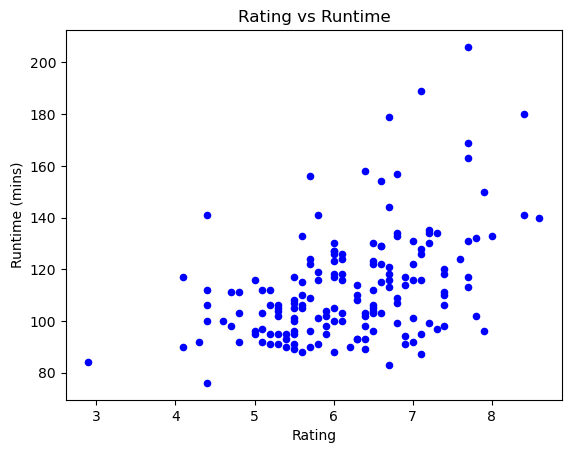

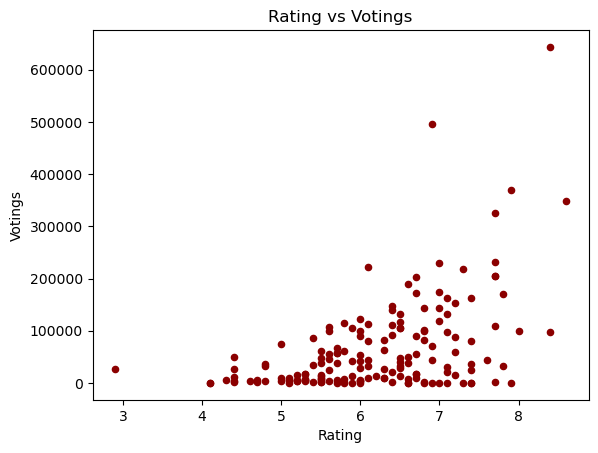

In [17]:
#scatter plots for rating vs runtime and votings

df.plot.scatter(x = 'Rating', y = 'Runtime (mins)', s = 20, c = 'blue', title = 'Rating vs Runtime')

df.plot.scatter(x = 'Rating', y = 'Votings', s = 20, c = 'darkred', title = 'Rating vs Votings')


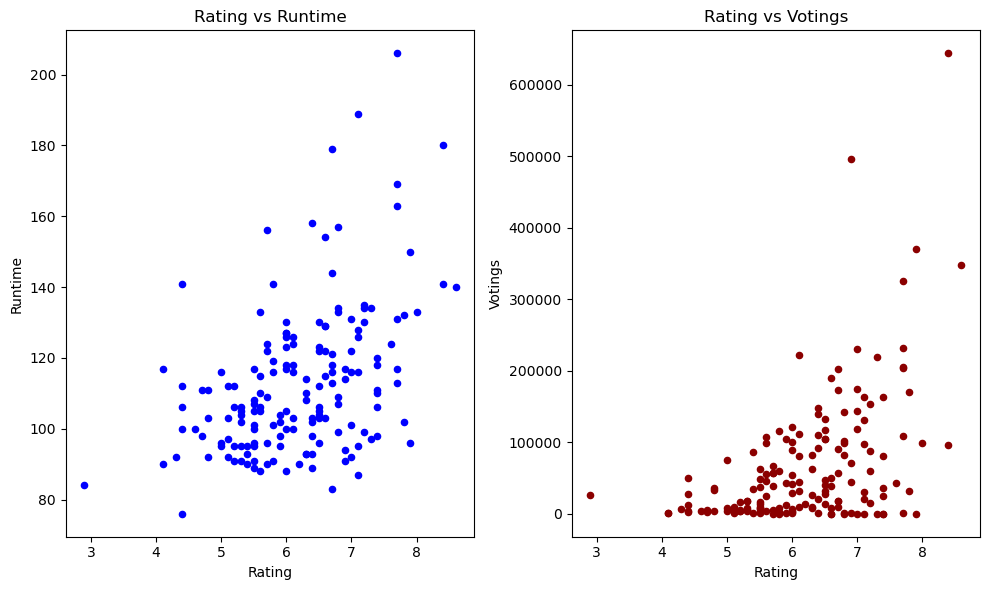

In [18]:

#scatter plots for rating vs runtime and votings
fig, axes = plt.subplots(1,2,figsize=(10,6))

axes[0].scatter(x = df['Rating'], y = df['Runtime (mins)'], s = 20, c = 'blue')
axes[0].set_title('Rating vs Runtime')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Runtime')

axes[1].scatter(x = df['Rating'], y = df['Votings'], s = 20, c = 'darkred')
axes[1].set_title('Rating vs Votings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Votings')

plt.tight_layout()
plt.show()


In [19]:
#Create a list that containing all types of genres

all_genres = df['Genres']

#list for collect unique genres
unique_genres = set()

#Itereate through all cells and split text and update genres to the set
for text in all_genres:
    genre = [gen.strip() for gen in text.split(',')]
    unique_genres.update(genre)
    
unique_genres = list(unique_genres)
print(unique_genres)
len(unique_genres)

['Fantasy', 'History', 'Comedy', 'Adventure', 'Biography', 'Thriller', 'Horror', 'Drama', 'Family', 'Musical', 'Sport', 'Western', 'Action', 'Mystery', 'Crime', 'Sci-Fi', 'War', 'Romance', 'Animation']


19

In [27]:
#Find number of films and mean rating for each genre

#Define dictionary that cantaining genre information

genre_info = {}


for genre in unique_genres:
    #Count the number of occurance of the each genre
    number_of_films = all_genres.str.contains(genre, case = False, na = False).sum()
    
    #Find mean rating for eadh genre
    mean_rating = df[all_genres.str.contains(genre, case = False, na = False)]['Rating'].mean()
    
    genre_info[genre] = {'Number of Films':number_of_films, 'Average Rating': mean_rating}
    
df2 = pd.DataFrame(genre_info).T.reset_index()
df2.columns = ['Genre Name','Number of Films','Average Rating']
df2['Number of Films'] = df2['Number of Films'].astype('int')
df2

,Genre Name,Number of Films,Average Rating
0,Fantasy,9,6.244444
1,History,11,6.945455
2,Comedy,65,6.140000
3,Adventure,43,6.318605
4,Biography,12,7.141667
5,Thriller,41,5.831707
6,Horror,30,5.726667
7,Drama,67,6.520896
8,Family,6,6.400000
9,Musical,1,4.400000


In [31]:
df2.sort_values(by = 'Number of Films', ascending = False)

,Genre Name,Number of Films,Average Rating
7,Drama,67,6.520896
2,Comedy,65,6.140000
12,Action,52,6.144231
3,Adventure,43,6.318605
5,Thriller,41,5.831707
6,Horror,30,5.726667
14,Crime,26,6.292308
13,Mystery,14,5.742857
17,Romance,13,6.184615
4,Biography,12,7.141667


In [30]:
df2.sort_values(by = 'Average Rating', ascending = False).head()

,Genre Name,Number of Films,Average Rating
4,Biography,12,7.141667
18,Animation,9,7.111111
10,Sport,5,7.000000
1,History,11,6.945455
16,War,1,6.900000


<Axes: title={'center': '2023 Films According to Genre'}, xlabel='Genre Name'>

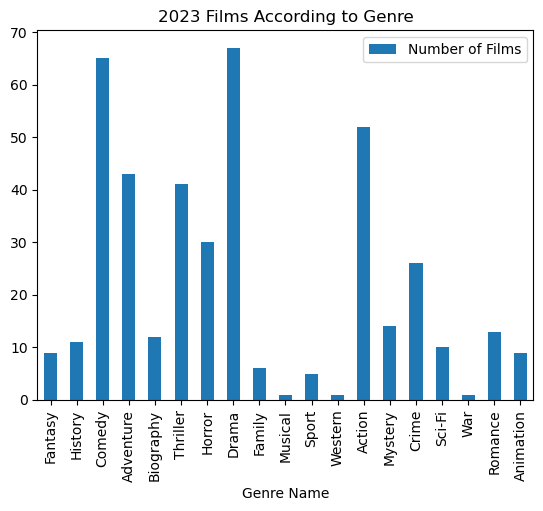

In [29]:
df2.plot.bar(x = 'Genre Name', y = 'Number of Films',  title = '2023 Films According to Genre')